In [34]:
import networkx as nx
import numpy as np
import matplotlib as plt
import random

In [2]:
def rand_pts(tam_i, rand_min=0, rand_max=100):
    pts = []
    for i in range(2**tam_i):
        p = np.random.randint(rand_min, rand_max, 2)
        pts.append(p)
    return pts

In [23]:
def euclid_dist(pts):
    edges = []
    for i in range(len(pts)):
        for j in range(len(pts)):
            if i != j:
                edges.append([i, j, abs(np.linalg.norm(pts[i]-pts[j]))])
    return edges

In [28]:
def manhat_dist(pts):
    edges = []
    for i in range(len(pts)):
        for j in range(len(pts)):
            if i != j:
                edges.append([i, j, np.sum(np.abs(pts[i][0]-pts[j][0]))])
    return edges

In [73]:
def create_graph_manhat(pts):
    G = nx.Graph()
    edges = manhat_dist(pts)
    G.add_weighted_edges_from(edges)
    return G

In [74]:
def create_graph_euclid(pts):
    G = nx.Graph()
    edges = euclid_dist(pts)
    G.add_weighted_edges_from(edges)
    return G

In [75]:
def twice_around(G):
    
    T=nx.minimum_spanning_tree(G)
    result = list(nx.dfs_preorder_nodes(T, source=0))
    result.append(0)
    
    w = 0
    for i in range(len(result)-1):
        w += G[result[i]][result[i+1]]['weight']
        
    return result, w

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


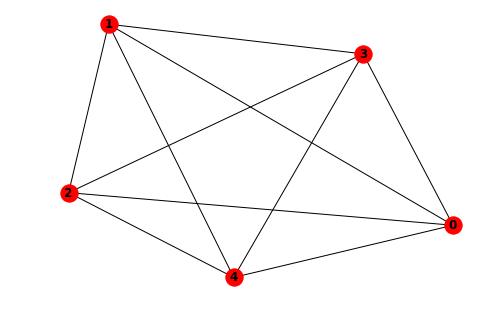

In [77]:
edges = [
    (0, 1, 4),
    (0, 2, 8),
    (0, 3, 9),
    (0, 4, 12),
    
    (1, 2, 6),
    (1, 3, 8),
    (1, 4, 9),
    
    (2, 3, 10),
    (2, 4, 11),
    
    (3, 4, 7)
]

G = nx.Graph()
G.add_weighted_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')

In [82]:
T=nx.minimum_spanning_tree(G)
result = list(nx.dfs_preorder_nodes(T, source=0))
result.append(0)
result

[0, 1, 2, 3, 4, 0]

In [84]:
w = 0
for i in range(len(result)-1):
    w += G[result[i]][result[i+1]]['weight']
print(w)

39


In [83]:
list(nx.dfs_labeled_edges(T, source=0))

[(0, 0, 'forward'),
 (0, 1, 'forward'),
 (1, 0, 'nontree'),
 (1, 2, 'forward'),
 (2, 1, 'nontree'),
 (1, 2, 'reverse'),
 (1, 3, 'forward'),
 (3, 4, 'forward'),
 (4, 3, 'nontree'),
 (3, 4, 'reverse'),
 (3, 1, 'nontree'),
 (1, 3, 'reverse'),
 (0, 1, 'reverse'),
 (0, 0, 'reverse')]

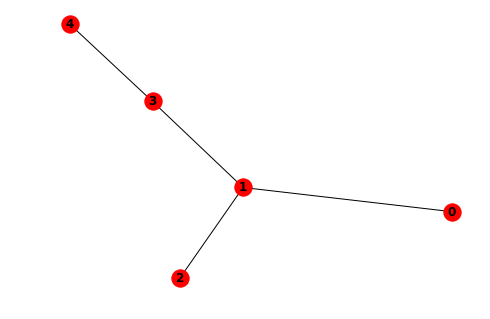

In [85]:
T=nx.minimum_spanning_tree(G)
nx.draw(T, with_labels=True, font_weight='bold')

In [87]:
T.degree[1]

3

In [91]:
d_list = list(T.degree(T.nodes))
d_list

[(0, 1), (1, 3), (2, 1), (3, 2), (4, 1)]

In [100]:
odd = []
for i in range(len(d_list)):
    if d_list[i][1]%2 == 1:
        odd.append(d_list[i][0])
odd

[0, 1, 2, 4]

In [119]:
sub_G = G.subgraph(odd)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


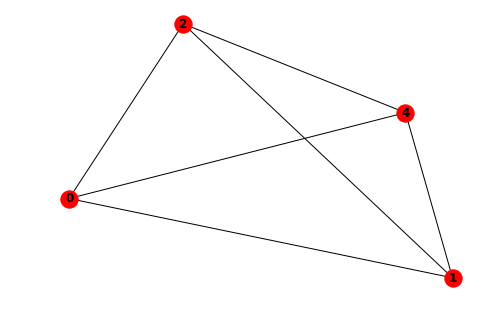

In [120]:
nx.draw(sub_G, with_labels=True, font_weight='bold')

In [122]:
nx.max_weight_matching(sub_G, maxcardinality=True)

{(0, 4), (1, 2)}

In [133]:
max_e = sorted(sub_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[0][2]['weight']
max_e

12

In [ ]:
for i in range(len(sub_G)):
    for j in range(1, len(sub_G)):
        try: sub_G[i][j]['weight'] = max_e - sub_G[i][j]['weight']
        except: print('pass')
print(w)